<a href="https://colab.research.google.com/github/fedorovgv/WIT/blob/main/week_7_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

**Регрессия**

---

В этой тетрадке мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси.

Подумайте зачем с практической точки зрения нам может быть нужно предсказывать длительность поездки на такси. 

Предсказывать мы будем с помощью `линейной регрессии` - это самая простая статистическая модель. На пальцах что такое линейная регрессия: 

- есть данные 
- в данных есть объект, который описывается признаками и для каждого объекта есть ответ 
- пример: объект - одна поездка, ответ - ее продолжительность
- хотим предсказать ответ для новых объектов

Немного упростим задачу, пусть у нас есть 5 объектов - поездки, которые описываются одним признвком - временем в который она была совершена (x) и ответом - длительностью (y). Изобразим их на графике:

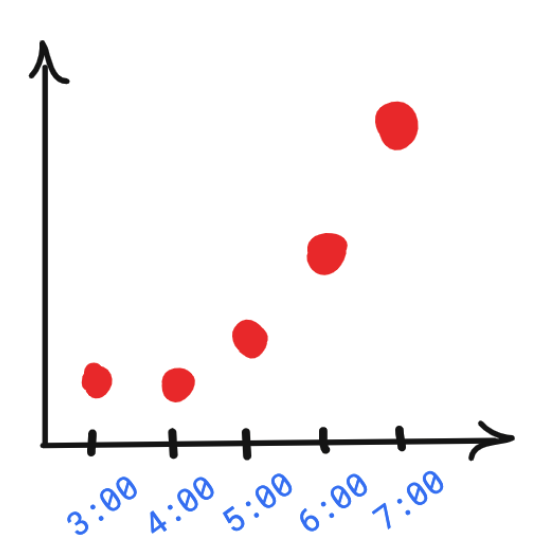

Предположим что мы хотим обучить линейную модель, которая бы предсказывала для нового объекта продолжительность поездки. По сути мы хотим отвечать на вопрос "сколько мы будем в пути если вызовем такси в x часов xx минут?". Слово "линейная" в данном случае означает что каждый признак будет линейно влиять на наш ответ, но с некоторым коэффициентом, то есть зависимость будет вида $$y=w*x + b$$. 

"Обучить модель" значит найти такие $w$, $b$ чтобы мы ошибались на наших обучающих данных как можно меньше. 

Почему ошибка неизбежна и мы будем ошибаться? Как видно на графике, красные точки не лежат на одной прямой, поэтому мы не сможем провести идеальную линию. 

Что такое ошибка и как ее померить? Давайте проведем какую-нибудь линию и посмотрим на нее. 

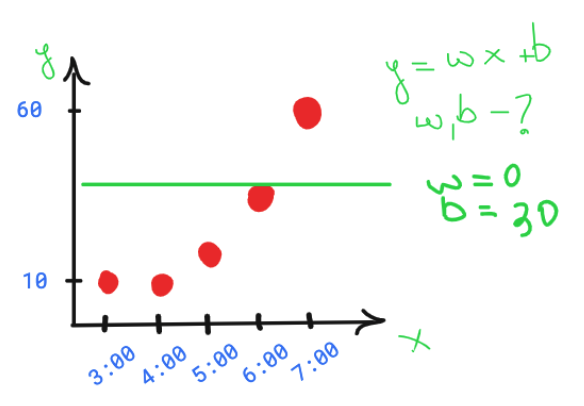

Предположим, что все поездки длились 30 минут и они не зависят от времени в которое мы вызываем такси. Очевидно, что такая модель плохая. Давайте, нарисуем другую модель и посмотрим на нее.

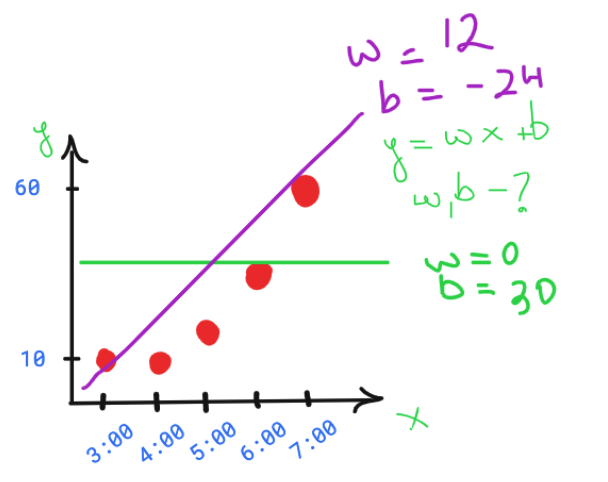

В фиолетовой модели мы предполагаем, что каждый час дает нам увеличение длительности поездки на 12 минут (более логично) и что в три часа ночи продолжительность поездки была 12 минут (см на график).

$$y=12*x - 24$$

В три часа ночи:

$$y := 12*3 - 24 = 12 \ ( \ минут)$$

В 7 часов утра:

$$y := 12*7 - 24 = 60 \ ( \ минут)$$

Идеально!

Как же посчитать ошибку и чтобы ошибка говорила нам о том, что зеленая модель хуже фиолетовой? Это поможет нам находить лучшую из возможных моделей. 

Давайте считать "расстояние" от модели до наших данных. Возьмем каждую красную точку и соотвествующую точку на моделях (что предсказывают модели в этих точках) и суммируем модули этих величин (подумайте зачем нам брать модули?). Изобразим их на графике для наглядности. 

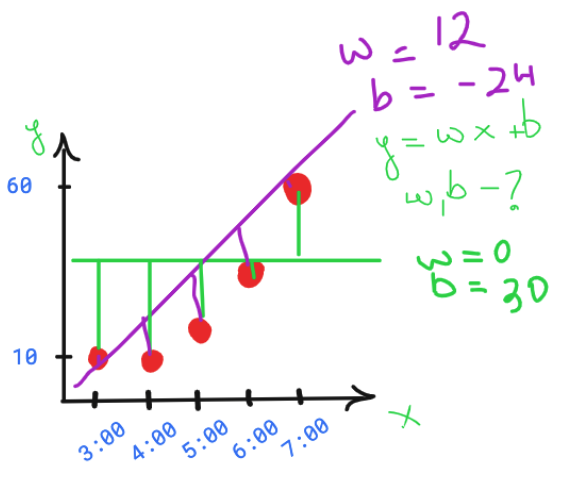

Можем видеть что сумма зеленых отрезочков будет больше суммы фиолетовых отрезочков. Такая ошибка и будет отвечать нашей логике о выборе лучшей модели. 

Построенная таким образом модель называется линейной регрессией с $\ell_1$ функцией потерь. Помимо модулей можно считать квадраты расстояний, то есть возводить в квадрат длины отрезочков и складывать их, такой метод используется в видео ниже. 
 
После простого введения посмотрим более полное [видео о линейной регрессии](https://www.youtube.com/watch?v=MM4onsNaLlI).



---

Теперь перейдем к реальным данным и попробуем сделать все то же самое но с бльших количеством признаков. 

Выолните две ячейки ниже, чтобы скачать данные. 

In [2]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Hf4CDMI1WTUdCA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)

with open('nyc-taxi.zip', 'wb') as f:
    f.write(download_response.content)

In [3]:
%%bash 

unzip nyc-taxi.zip
# unzip test.zip -d .
unzip train.zip -d .
rm *.zip 

Archive:  nyc-taxi.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               
Archive:  test.zip
  inflating: ./test.csv              
Archive:  train.zip
  inflating: ./train.csv             


#### **часть 1**

Загрузите данные из `train.csv` в датафрейм с помощью функции `pd.read_csv()`:

<font color='blue'>* изучите датафрейм самостоятельно и разберитесь что означает каждая из колонок по ссылке выше</font>

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки.

<font color='blue'>* найти как удалить колонку из пандаса можно в документации pandas или в google</font>

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение этого значения в обучающей выборке. Для этого нарисуйте его гистограмму:


<font color='blue'>* в этом может помочь функция `matplotlib.pyplot.hist`, обратите внимание, что мы уже импортировали модуль `matplotlib.pyplot` под кратким названием `plt`, поэтому можем вызвать функцию как `plt.hist`; как она работает можно посмотреть в документации</font>

<font color='blue'>** изначально может получится очень странный график, попробуйте улучшить его, возможно вам поможет фильтрация данных в колонке</font>

**Вопрос:** Что можно сказать о целевой переменной по гистограмме её значений? 

*   ?
*   ?



#### **часть 2**

Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

  <font color='blue'>* данные годовые, для того чтобы построить такую зависимость нам нужно создать новую колонку куда положить день и месяц, их можно взять из колонки `pickup_datetime`</font>

  <font color='blue'>** строить можно с помощью функции `sns.countplot`, `sns` это более красивая версия `plt`</font>

**Вопрос:** Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Задание со звездочкой (*)** Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

<font color='blue'>* воспользуйтесь sns.relplot </font>

**Вопрос** Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

*   ?
*   ?


#### **часть 3** 

Подготовьте данные к обучению, подумайте какие признаки нужно обработать и как. 

<font color='blue'>* об этом говориться в видео из шапки тетрадки</font>